In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r"C:/Users/User/Downloads/UDEMY_TSA_FINAL/UDEMY_TSA_FINAL/Data/airline_passengers.csv", parse_dates=True, index_col = 'Month')

In [3]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
df.index.freq = 'MS'

In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
#try for simle exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [10]:
span=12
alpha=2/(span+1)

In [26]:
df['EWMA12'] = df['Thousands of Passengers'].ewm(alpha=alpha,adjust=False).mean()

In [27]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.923077
1949-02-01,118,112.923077,115.857988
1949-03-01,132,115.857988,117.879836
1949-04-01,129,117.879836,118.359861
1949-05-01,121,118.359861,120.919883


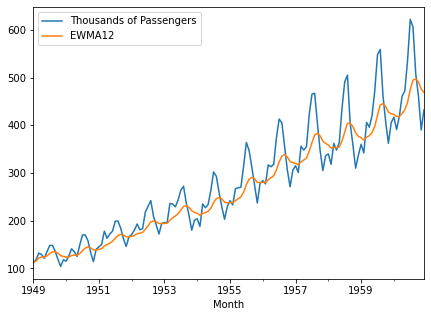

In [14]:
df[['Thousands of Passengers','EWMA12']].plot(figsize=(7,5));

In [28]:
model = SimpleExpSmoothing(df['Thousands of Passengers'])

In [29]:
fitted_model=model.fit(smoothing_level=alpha, optimized=False)

In [30]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [33]:
df['SES12'] = fitted_model.fittedvalues.shift(-1)

In [34]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [37]:
#trens look linear so use 'add'

from statsmodels.tsa.holtwinters import ExponentialSmoothing
df['DES_add_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='add').fit().fittedvalues.shift(-1)

In [38]:
df['DES_add_12']

Month
1949-01-01    114.102394
1949-02-01    120.040657
1949-03-01    134.001539
1949-04-01    131.085845
1949-05-01    123.110263
                 ...    
1960-08-01    608.168786
1960-09-01    510.571382
1960-10-01    463.313463
1960-11-01    392.424879
1960-12-01           NaN
Freq: MS, Name: DES_add_12, Length: 144, dtype: float64

In [39]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_add_12'], dtype='object')

<AxesSubplot:xlabel='Month'>

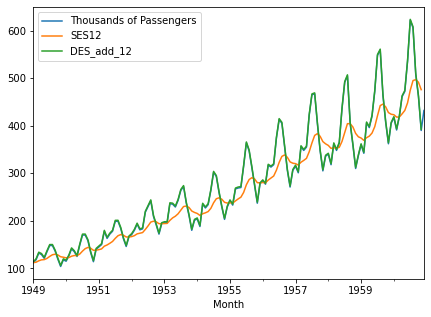

In [40]:
df[['Thousands of Passengers', 'SES12','DES_add_12']].plot(figsize=(7,5))

In [ ]:
#triple exponential smoothing


In [41]:
df['DES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul').fit().fittedvalues.shift(-1)

In [42]:
df['DES_mul_12']

Month
1949-01-01    113.990701
1949-02-01    120.031669
1949-03-01    134.235979
1949-04-01    131.270786
1949-05-01    123.156267
                 ...    
1960-08-01    616.673652
1960-09-01    517.378618
1960-10-01    469.290950
1960-11-01    397.168079
1960-12-01           NaN
Freq: MS, Name: DES_mul_12, Length: 144, dtype: float64

<AxesSubplot:xlabel='Month'>

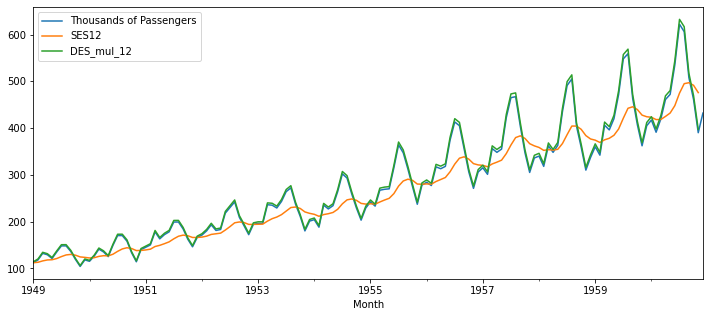

In [44]:
df[['Thousands of Passengers', 'SES12','DES_mul_12']].plot(figsize=(12,5))

In [45]:
df['TES_mul_12'] = ExponentialSmoothing(df['Thousands of Passengers'], trend='mul', seasonal_periods=12).fit().fittedvalues.shift(-1)

<AxesSubplot:xlabel='Month'>

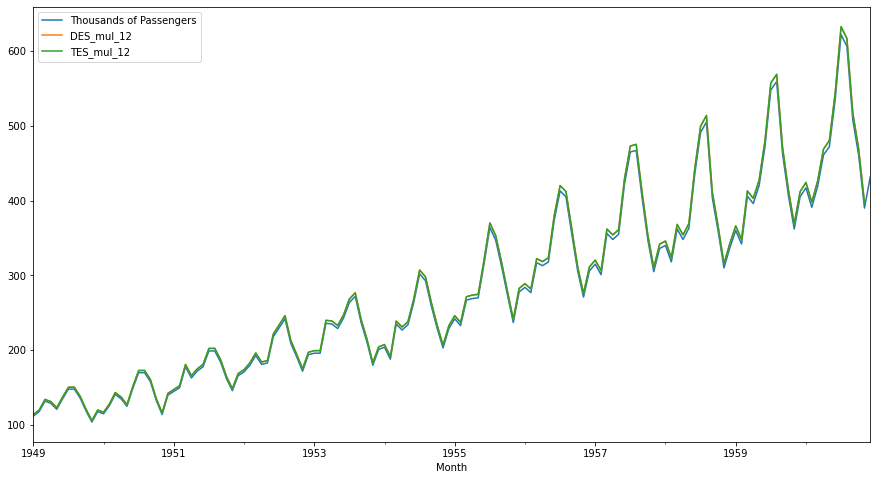

In [49]:
df[['Thousands of Passengers', 'DES_mul_12','TES_mul_12']].plot(figsize=(15,8))